# Neural Network

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from graphviz import Digraph

%matplotlib inline  

# Linear perceptron

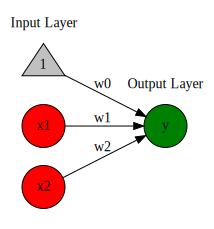

In [3]:
# create a new Digraph object
dot = Digraph(comment='Neural Network')
dot.attr(rankdir='LR')
dot.attr(splines='line')
dot.attr('node', shape='circle', fixedsize='true', width='0.6', height='0.6')

with dot.subgraph(name='cluster_0') as c:
    c.attr(color='white', label='Input Layer')
    c.attr('node', shape='triangle')
    c.node('1', '1', style='filled', fillcolor='silver')
    c.attr('node', shape='circle')
    c.node('x1', 'x1', style='filled', fillcolor='red')
    c.node('x2', 'x2', style='filled', fillcolor='red')
    

with dot.subgraph(name='cluster_2') as c:
    c.attr(color='white', label='Output Layer')
    c.node('y', 'y', style='filled', fillcolor='green')

# add edges to the graph
dot.edge('x1', 'y', label='w1') 
dot.edge('x2', 'y', label='w2')
dot.edge('1', 'y', label='w0')

# render the graph
dot

# Activation Function

We will use the following activation function: *Binary step*, where: 
$$f(z_i) = 
\begin{cases} 
0 & \text{if } z_i \leq 0, \\
1 & \text{if } z > 0.
\end{cases}$$

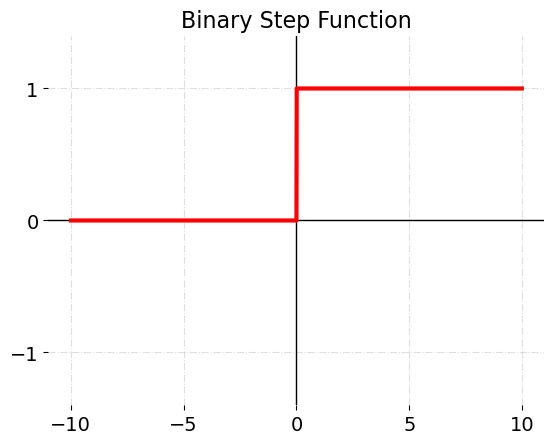

In [3]:
# generate x values between -10 and 10 and y values if x > 0, then y =1 otherwise y = 0 and plot
x = np.arange(-10, 10, 0.01)
y = np.vectorize(lambda x: 1 if x > 0 else 0, otypes=[float])

# plot the function
def plot(func, yaxis=(-1.4, 1.4), title=None):
    plt.ylim(yaxis)
    plt.title(title, fontsize = 16)
    plt.locator_params(nbins=5)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.axhline(lw=1, c='black')
    plt.axvline(lw=1, c='black')
    plt.grid(alpha=0.4, ls='-.')
    plt.box(on=None)
    plt.plot(x, func(x), c='r', lw=3)

plot(y, title='Binary Step Function')


# Example - Logic XOR

We are going to explore the XOR case with the following data:

| $x_1$ | $x_2$ | y |
|---|---|---------|
| 0 | 0 |    0    |
| 1 | 0 |    1    |
| 0 | 1 |    1    |
| 1 | 1 |    0    |


In [4]:
X = [[1,0,0],
    [1,1,0],
    [1,0,1],
    [1,1,1]]

y = [0,1,1,0]


## Initial Values

In [5]:
w = np.zeros(len(X[0]))

## First Epoch

### First Row

Node $y$ is define by:
- Input:
$$z_1=w_1X_1+w_2X_2+b$$
- Output: 
$$\hat{y}=f_1(z_1)$$

In [6]:
def activation_function(z):
    if z > 0:
        return 1
    else:
        return 0

def perceptron_train(X, w):
    z = np.dot(X, w)
    y_hat = activation_function(z)
    return y_hat

In [7]:
z = perceptron_train(X[0], w)
print('z = ', z)
y_hat = activation_function(z)
print('y_hat = ', y_hat)

z =  0
y_hat =  0


#### Total Error (Cost Function)

Totalt error is define by: 

$$E_{total}=\frac{1}{2}\sum_{i=1}^{n}(\hat{y_i}-y_i)^2$$

In [8]:
error = 1/2*(y[0] - y_hat)**2
print('Error = ', error)

Error =  0.0


#### Weight Update

We need to update the weights of the network, and this can be expressed as:
$$w_i^*=w_i+\Delta w_i$$
The $\Delta w_i$ is estimated as: 
$$\Delta w_i=\alpha(y_i-\hat{y_i})*x_i$$
where: 
- $w_i$ is the weight for case $i$
- $\alpha$ is the learning rate, when $\alpha \in \{0,1\}$
- $y$ is the actual value ("true class")
- $\hat{y}$ is the predicted value ("predicted class")
- $x_i$ is the vector of inputs for case $i$

We have three condition in order to update the weights:
1. **No updated $w_1$:** When $\hat{y_i}=y_i$, it is not necessary updated $w_i$, because: $(y_i-\hat{y_i})=(y_i-y_i)=0$, then $\Delta w_i=0$, at the end: $$w_i^*=w_i$$
2. **Decrease $w_i$:** When $\hat{y_i}>y_i$, means that $y_i=0$ and $\hat{y}=1$, then $(y_i-\hat{y_i})=(0-1)=-1$, then $\Delta w_i=-\alpha x_1$, at the end $$w_i^*=w_i-\alpha x_1$$
3. **Increase $w_i$:** When $\hat{y_i}<y_i$, means that $y_i=1$ and $\hat{y}=0$, then $(y_i-\hat{y_i})=(1-0)=1$, then $\Delta w_i=\alpha x_1$, at the end $$w_i^*=w_i+\alpha x_1$$

In [9]:
errors = []

def updated_weights(w, X, y, y_hat, learning_rate):
    total_error = 0
    if y == y_hat:
        print(f'Case: yhat = y, x: {X}, w: {w}, z: {np.dot(X, w)}, y: {y}', end=' ')
        w = w
        print('=> W no updated:', w)
    elif y < y_hat:
        print(f'Case: y < y_hat, x: {X}, w: {w}, z: {np.dot(X, w)}, y: {y}', end=' ')
        w = w - learning_rate*X
        print('=> W updated:', w)
        total_error += 1
    elif y > y_hat:
        print(f'Case: y > y_hat, x: {X}, w: {w}, z: {np.dot(X, w)}, y: {y}', end=' ')
        w = w + learning_rate*X
        print('=> W updated:', w)
        total_error += 1
    errors.append(total_error)
    return w

In [10]:
print('w:', w)
print('X:', X[0])
print('y:', y[0])
print('y_hat:', y_hat)


w: [0. 0. 0.]
X: [1, 0, 0]
y: 0
y_hat: 0


In [11]:
w = updated_weights(w=w, X=X[0], y=y[0], y_hat=y_hat, learning_rate=1)
print('w* = ', w)
print('Total Error = ', sum(errors))

Case: yhat = y, x: [1, 0, 0], w: [0. 0. 0.], z: 0.0, y: 0 => W no updated: [0. 0. 0.]
w* =  [0. 0. 0.]
Total Error =  0


### Second Row

Node $y$ is define by:
- Input:
$$z_1=w_1X_1+w_2X_2+b$$
- Output: 
$$\hat{y}=f_1(z_1)$$

In [12]:
z = perceptron_train(X[1], w)
print('z = ', z)
y_hat = activation_function(z)
print('y_hat = ', y_hat)

z =  0
y_hat =  0


#### Total Error (Cost Function)

Totalt error is define by: 

$$E_{total}=\frac{1}{2}\sum_{i=1}^{n}(\hat{y_i}-y_i)^2$$

In [13]:
error = 1/2*(y[1] - y_hat)**2
print('Error = ', error)

Error =  0.5


#### Weight Update

We need to update the weights of the network, and this can be expressed as:
$$w_i^*=w_i+\Delta w_i$$
The $\Delta w_i$ is estimated as: 
$$\Delta w_i=\alpha(y_i-\hat{y_i})*x_i$$
where: 
- $w_i$ is the weight for case $i$
- $\alpha$ is the learning rate, when $\alpha \in \{0,1\}$
- $y$ is the actual value ("true class")
- $\hat{y}$ is the predicted value ("predicted class")
- $x_i$ is the vector of inputs for case $i$

We have three condition in order to update the weights:
1. **No updated $w_1$:** When $\hat{y_i}=y_i$, it is not necessary updated $w_i$, because: $(y_i-\hat{y_i})=(y_i-y_i)=0$, then $\Delta w_i=0$, at the end: $$w_i^*=w_i$$
2. **Decrease $w_i$:** When $\hat{y_i}>y_i$, means that $y_i=0$ and $\hat{y}=1$, then $(y_i-\hat{y_i})=(0-1)=-1$, then $\Delta w_i=-\alpha x_1$, at the end $$w_i^*=w_i-\alpha x_1$$
3. **Increase $w_i$:** When $\hat{y_i}<y_i$, means that $y_i=1$ and $\hat{y}=0$, then $(y_i-\hat{y_i})=(1-0)=1$, then $\Delta w_i=\alpha x_1$, at the end $$w_i^*=w_i+\alpha x_1$$

In [14]:
print('w:', w)
print('X:', X[1])
print('y:', y[1])
print('y_hat:', y_hat)


w: [0. 0. 0.]
X: [1, 1, 0]
y: 1
y_hat: 0


In [15]:
w = updated_weights(w=w, X=X[1], y=y[1], y_hat=y_hat, learning_rate=1)
print('w* = ', w)
print('Total Error = ', sum(errors))

Case: y > y_hat, x: [1, 1, 0], w: [0. 0. 0.], z: 0.0, y: 1 => W updated: [1. 1. 0.]
w* =  [1. 1. 0.]
Total Error =  1


## Full Code

In [16]:
# Activation function
def activation_function(z):
    if z > 0:
        return 1
    else:
        return 0

# Update weights
def updated_weights(w, X, y, y_hat, learning_rate):
    total_error = 0
    if y == y_hat:
        print(f'Case: yhat = y, x: {X}, w: {w}, z: {np.dot(X, w)}, y: {y}', end=' ')
        w = w
        print('=> W no updated:', w)
    elif y < y_hat:
        print(f'Case: y < y_hat, x: {X}, w: {w}, z: {np.dot(X, w)}, y: {y}', end=' ')
        w = w - learning_rate*X
        print('=> W updated:', w)
        total_error += 1
    elif y > y_hat:
        print(f'Case: y > y_hat, x: {X}, w: {w}, z: {np.dot(X, w)}, y: {y}', end=' ')
        w = w + learning_rate*X
        print('=> W updated:', w)
        total_error += 1
    errors.append(total_error)
    return w

# Perceptron training
def perceptron_train(X, y, epochs=1, learning_rate=1):
    total_errors = []  # To store total errors per epoch
    w = np.zeros(len(X[0])) # Initialize weights to zero

    # Loop through epochs
    for epoch in range(epochs):
        print('---------------------------------\nEpoch: ', epoch + 1)

        total_error = 0  # Initialize total error for this epoch

        # Loop through all instances in X
        for i in range(X.shape[0]):
            z = np.dot(X[i], w) # Compute dot product of X[i] and w
            y_hat = activation_function(z) # Apply activation function
            w = updated_weights(w, X[i], y[i], y_hat, learning_rate) # Update weights
            total_error += errors[-1]  # Accumulate total error for this epoch

        total_errors.append(total_error)  # Store total error for this epoch

    # Visualize total error per epoch
    plt.plot(range(epochs), total_errors) # Set the x-axis to show epoch numbers
    plt.title('Total Error per Epoch', fontsize = 16)
    plt.locator_params(nbins=5)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.axhline(lw=1, c='black')
    plt.axvline(lw=1, c='black')
    plt.grid(alpha=0.4, ls='-.')
    plt.box(on=None)
    plt.xlabel('Epoch', fontsize = 14)
    plt.ylabel('Total Loss', fontsize = 14)
    plt.show()

    return w

# Predict using the trained model
def predict(X, w):
    yhat = 0
    z = np.dot(X, w)
    if(z > 0):
        yhat = 1
    return yhat

In [28]:
def data(logic=None):
    if logic == 'AND':
        X = [[1,0,0],
            [1,1,0],
            [1,0,1],
            [1,1,1]]

        y = [0,0,0,1]
    elif logic == 'OR':
        X = [[1,0,0],
            [1,1,0],
            [1,0,1],
            [1,1,1]]

        y = [0,1,1,1]
    elif logic == 'XOR':
        X = [[1,0,0],
            [1,1,0],
            [1,0,1],
            [1,1,1]]

        y = [0,1,1,0]

    return X, y

X, y = data(logic='AND')
print('X:', X)
print('y:', y)



X: [[1, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 1]]
y: [0, 0, 0, 1]


In [4]:
class data:
    def __init__(self, logic=None):
        self.logic = logic
        self.X = []
        self.y = []

        if logic == 'AND':
            self.X = [[1,0,0],
                [1,1,0],
                [1,0,1],
                [1,1,1]]

            self.y = [0,0,0,1]
        elif logic == 'OR':
            self.X = [[1,0,0],
                [1,1,0],
                [1,0,1],
                [1,1,1]]

            self.y = [0,1,1,1]
        elif logic == 'XOR':
            self.X = [[1,0,0],
                [1,1,0],
                [1,0,1],
                [1,1,1]]

            self.y = [0,1,1,0]

In [5]:
df = data(logic='AND')
df.X

[[1, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 1]]

---------------------------------
Epoch:  1
Case: yhat = y, x: [1 0 0], w: [0. 0. 0.], z: 0.0, y: 0 => W no updated: [0. 0. 0.]
Case: yhat = y, x: [1 1 0], w: [0. 0. 0.], z: 0.0, y: 0 => W no updated: [0. 0. 0.]
Case: yhat = y, x: [1 0 1], w: [0. 0. 0.], z: 0.0, y: 0 => W no updated: [0. 0. 0.]
Case: y > y_hat, x: [1 1 1], w: [0. 0. 0.], z: 0.0, y: 1 => W updated: [0.25 0.25 0.25]
---------------------------------
Epoch:  2
Case: y < y_hat, x: [1 0 0], w: [0.25 0.25 0.25], z: 0.25, y: 0 => W updated: [0.   0.25 0.25]
Case: y < y_hat, x: [1 1 0], w: [0.   0.25 0.25], z: 0.25, y: 0 => W updated: [-0.25  0.    0.25]
Case: yhat = y, x: [1 0 1], w: [-0.25  0.    0.25], z: 0.0, y: 0 => W no updated: [-0.25  0.    0.25]
Case: y > y_hat, x: [1 1 1], w: [-0.25  0.    0.25], z: 0.0, y: 1 => W updated: [0.   0.25 0.5 ]
---------------------------------
Epoch:  3
Case: yhat = y, x: [1 0 0], w: [0.   0.25 0.5 ], z: 0.0, y: 0 => W no updated: [0.   0.25 0.5 ]
Case: y < y_hat, x: [1 1 0], w: [0.   0.

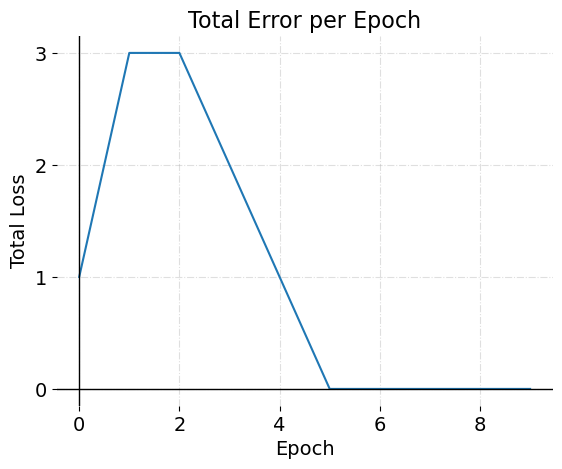

Learned Weights: [-0.5   0.25  0.5 ]


In [29]:
w=perceptron_train(np.array(X), y, epochs=10, learning_rate=0.25)
print('Learned Weights:', w)

### Predict XOR with the learned weights of the Perceptron

In [20]:
for i in range(4):
    print(X[i], X[i][1],' XOR ', X[i][2],' = ', predict(X[i],w))

[1, 0, 0] 0  XOR  0  =  1
[1, 1, 0] 1  XOR  0  =  1
[1, 0, 1] 0  XOR  1  =  0
[1, 1, 1] 1  XOR  1  =  0


### Neural Network of the XOR function

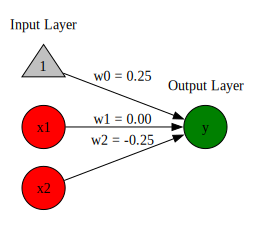

In [25]:
# Neural Network of the XOR function

# create a new Digraph object
dot = Digraph(comment='Neural Network')
dot.attr(rankdir='LR')
dot.attr(splines='line')
dot.attr('node', shape='circle', fixedsize='true', width='0.6', height='0.6')

with dot.subgraph(name='cluster_0') as c:
    c.attr(color='white', label='Input Layer')
    c.attr('node', shape='triangle')
    c.node('1', '1', style='filled', fillcolor='silver')
    c.attr('node', shape='circle')
    c.node('x1', 'x1', style='filled', fillcolor='red')
    c.node('x2', 'x2', style='filled', fillcolor='red')
    

with dot.subgraph(name='cluster_2') as c:
    c.attr(color='white', label='Output Layer')
    c.node('y', 'y', style='filled', fillcolor='green')

# add edges to the graph with weights
dot.edge('1', 'y', label=f'w0 = {w[0]:.2f}')
dot.edge('x1', 'y', label=f'w1 = {w[1]:.2f}')
dot.edge('x2', 'y', label=f'w2 = {w[2]:.2f}')

# render the graph
dot


# Multi Layer Perceptron

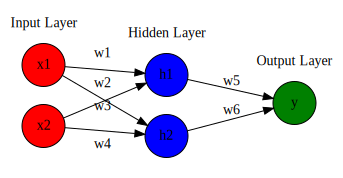

In [41]:
# create a new Digraph object
dot = Digraph(comment='Neural Network')
dot.attr(rankdir='LR')
dot.attr(splines='line')
dot.attr('node', shape='circle', fixedsize='true', width='0.6', height='0.6')

with dot.subgraph(name='cluster_0') as c:
    c.attr(color='white', label='Input Layer')
    c.node('x1', 'x1', style='filled', fillcolor='red')
    c.node('x2', 'x2', style='filled', fillcolor='red')

with dot.subgraph(name='cluster_1') as c:
    c.attr(color='white', label='Hidden Layer')
    c.node('h1', 'h1', style='filled', fillcolor='blue')
    c.node('h2', 'h2', style='filled', fillcolor='blue')

with dot.subgraph(name='cluster_2') as c:
    c.attr(color='white', label='Output Layer')
    c.node('y', 'y', style='filled', fillcolor='green')

# add edges to the graph
dot.edge('x1', 'h1', label='w1')
dot.edge('x1', 'h2', label='w2')
dot.edge('x2', 'h1', label='w3')
dot.edge('x2', 'h2', label='w4')
dot.edge('h1', 'y', label='w5') 
dot.edge('h2', 'y', label='w6')

# render the graph
dot

# Initial Values